# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [47]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_raw_df = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
study_raw_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [48]:
# Checking the number of mice.
study_raw_df.nunique()["Mouse ID"]

249

In [49]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
study_raw_df["Mouse ID"].value_counts().idxmax()

'g989'

In [50]:
# Optional: Get all the data for the duplicate mouse ID. 
study_raw_df[study_raw_df["Mouse ID"] == 'g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [51]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = study_raw_df[study_raw_df["Mouse ID"] != 'g989']
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [52]:
# Checking the number of mice in the clean DataFrame
clean_data.nunique()["Mouse ID"]

248

## Summary Statistics

In [54]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_regimen_data = clean_data[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen")


mean_tumor_volume = drug_regimen_data.mean().rename(columns={"Tumor Volume (mm3)": "Mean Tumor Volume"})
median_tumor_volume = drug_regimen_data.median().rename(columns={"Tumor Volume (mm3)": "Median Tumor Volume"})
variance_tumor_volume = drug_regimen_data.var().rename(columns={"Tumor Volume (mm3)": "Tumor Volume Variance"})
std_dev_tumor_volume = drug_regimen_data.std().rename(columns={"Tumor Volume (mm3)": "Tumor Volume Std. Dev."})
std_err_tumor_volume = drug_regimen_data.sem().rename(columns={"Tumor Volume (mm3)": "Tumor Volume Std. Err."})

drug_regimen_summary_stats = pd.merge(mean_tumor_volume, median_tumor_volume, on="Drug Regimen")
drug_regimen_summary_stats = pd.merge(drug_regimen_summary_stats, variance_tumor_volume, on="Drug Regimen")
drug_regimen_summary_stats = pd.merge(drug_regimen_summary_stats, std_dev_tumor_volume, on="Drug Regimen")
drug_regimen_summary_stats = pd.merge(drug_regimen_summary_stats, std_err_tumor_volume, on="Drug Regimen")

drug_regimen_summary_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [55]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_regimen_data.aggregate(["mean", "median", "var", "std", "sem"])

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

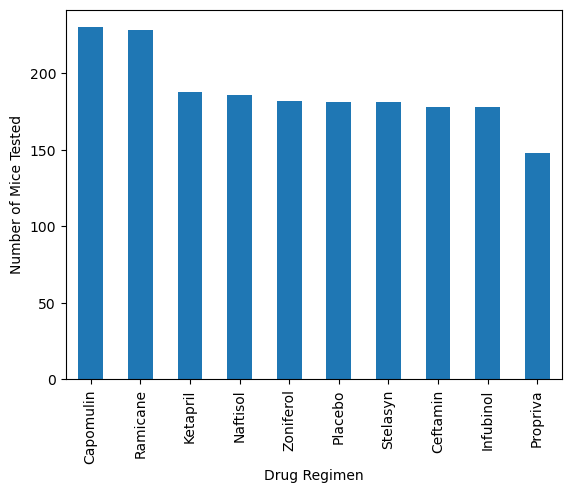

In [57]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

timepoint_data = clean_data[["Drug Regimen","Timepoint"]].groupby("Drug Regimen").count().sort_values(by="Timepoint", ascending=False)
pd_plot = timepoint_data.plot.bar(legend=False)
pd_plot.set_ylabel('Number of Mice Tested')
plt.show()


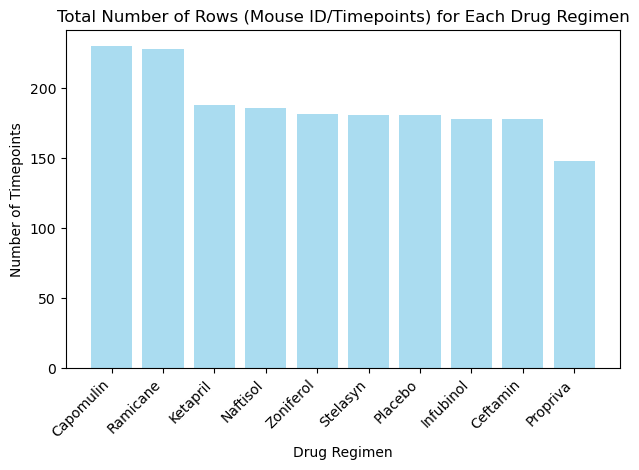

In [58]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

drug_regimen_counts = clean_data['Drug Regimen'].value_counts()

regimens = drug_regimen_counts.index
counts = drug_regimen_counts.values

plt.bar(regimens, counts, color='skyblue', alpha=0.7)

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


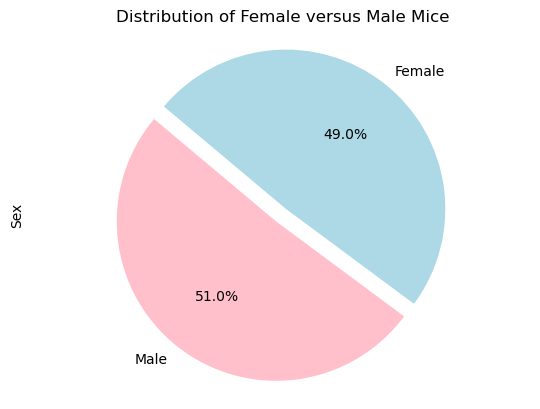

In [59]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_counts = clean_data['Sex'].value_counts()

gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['pink', 'lightblue'], startangle=140, explode=(0.1, 0))

plt.title('Distribution of Female versus Male Mice')

plt.axis('equal')  
plt.show()


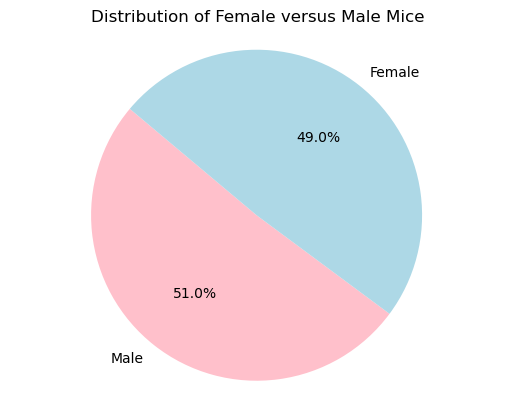

In [60]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts = clean_data['Sex'].value_counts()

plt.pie(gender_counts, labels=gender_counts.index, colors=['pink', 'lightblue'], autopct='%1.1f%%', startangle=140)

plt.title('Distribution of Female versus Male Mice')

plt.axis('equal')  
plt.show()


## Quartiles, Outliers and Boxplots

In [61]:
# Start by getting the last (greatest) timepoint for each mouse
group_df = clean_data[["Timepoint", "Mouse ID"]].groupby("Mouse ID").max()

# Cleanup index - setting "Mouse ID" as a column and resetting the index
group_df["Mouse ID"] = group_df.index
group_df.reset_index(drop=True, inplace=True)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
def get_tumor_vol(row):
    queried_row = clean_data.loc[(clean_data["Mouse ID"] == row["Mouse ID"]) & (clean_data["Timepoint"] == row["Timepoint"])]

    return queried_row["Tumor Volume (mm3)"].iloc[0]

def get_regimen(row):
    queried_row = clean_data.loc[(clean_data["Mouse ID"] == row["Mouse ID"]) & (clean_data["Timepoint"] == row["Timepoint"])]

    return queried_row["Drug Regimen"].iloc[0]

group_df["Tumor Volume"] = group_df.apply(get_tumor_vol, axis=1)
group_df["Drug Regimen"] = group_df.apply(get_regimen, axis=1)


In [62]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
mice_tumor_volume_by_regimen = []

# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    # Add subset 
    treated_mice = clean_data.loc[clean_data["Drug Regimen"] == treatment]

    mice_tumor_volume_by_regimen.append(treated_mice["Tumor Volume (mm3)"])

    # Determine outliers using upper and lower bounds

    # Get quartiles, IQR, and upper and lower bounds
    quartiles = treated_mice["Tumor Volume (mm3)"].quantile([.25, .5, .75])

    first_q = quartiles[0.25]
    third_q = quartiles[0.75]

    iqr = third_q - first_q

    lower_bound = first_q - (1.5 * iqr)
    upper_bound = third_q + (1.5 * iqr)

    # Get outliers
    lower_outlier_df = treated_mice.loc[treated_mice["Tumor Volume (mm3)"] < lower_bound]
    upper_outlier_df = treated_mice.loc[treated_mice["Tumor Volume (mm3)"] > upper_bound]

    outliers_df = pd.concat([lower_outlier_df, upper_outlier_df])

    print(f"Outliers for mice on {treatment}")
    print(outliers_df.head())
    print("\n")




Outliers for mice on Capomulin
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
1699     s185         40           25.472143                 1    Capomulin   
1700     s185         45           23.343598                 1    Capomulin   

         Sex  Age_months  Weight (g)  
1699  Female           3          17  
1700  Female           3          17  


Outliers for mice on Ramicane
    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
514     k403         45           22.050126                 1     Ramicane   

      Sex  Age_months  Weight (g)  
514  Male          21          16  


Outliers for mice on Infubinol
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []


Outliers for mice on Ceftamin
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []




/var/folders/nc/9kc3mh1j335_gk6r3c_5x9jm0000gn/T/ipykernel_97226/867652089.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(treatments)


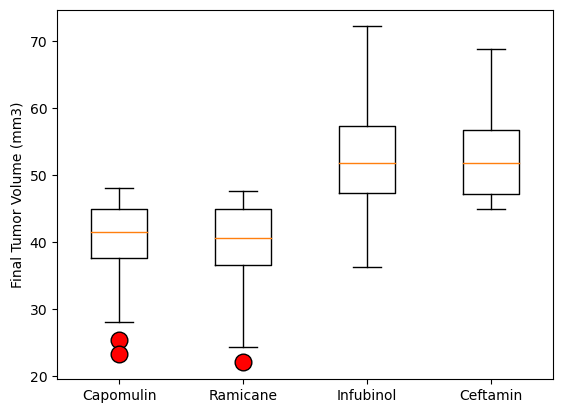

In [63]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.set_xticklabels(treatments)
ax.boxplot(mice_tumor_volume_by_regimen, flierprops={"markerfacecolor": "r", "markersize": 12})
plt.show()



## Line and Scatter Plots

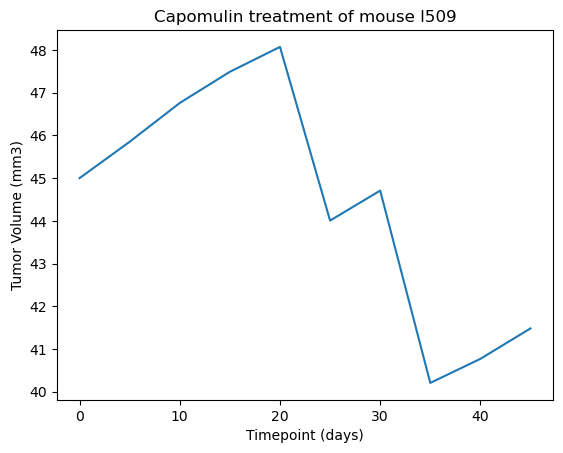

In [65]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
l509_mouse_data = clean_data.loc[clean_data["Mouse ID"] == "l509"]

plt.plot(l509_mouse_data["Timepoint"], l509_mouse_data["Tumor Volume (mm3)"])
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

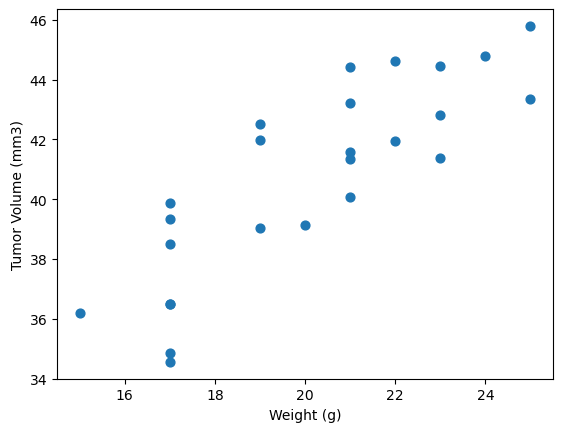

In [67]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_mice = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]
capomulin_mice_avg = capomulin_mice.groupby("Mouse ID").mean()
capomulin_mice_avg.plot.scatter(x="Weight (g)", y="Tumor Volume (mm3)", s=40)
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


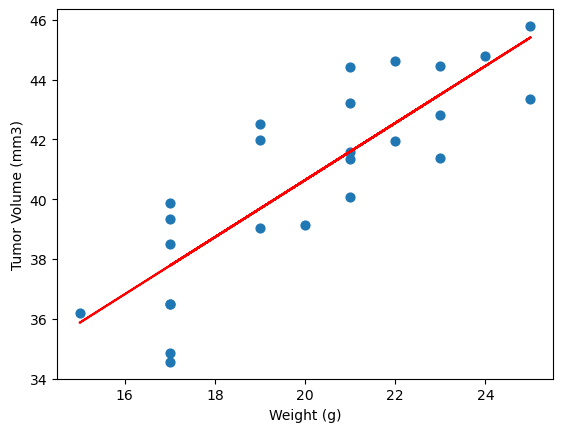

In [68]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulin_mice_avg["Weight (g)"], capomulin_mice_avg["Tumor Volume (mm3)"])
regress_values = capomulin_mice_avg["Weight (g)"] * slope + intercept

capomulin_mice_avg.plot.scatter(x="Weight (g)", y="Tumor Volume (mm3)", s=40)
plt.plot(capomulin_mice_avg["Weight (g)"],regress_values,"r-")

print(f"The correlation between mouse weight and the average tumor volume is {rvalue:.2f}")